### Hotel review 

This [dataset](https://www.kaggle.com/harmanpreet93/hotelreviews) from Kaggle.
It contain user,text review and response from the cutomer.

In [1]:
#import nessesary library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re #for text process

### text process

#### Stopwords
In the text classification, There are a lot of word appear frequenly that doesn't matter such as I,You,a,an etc.

They can make flaiure classification


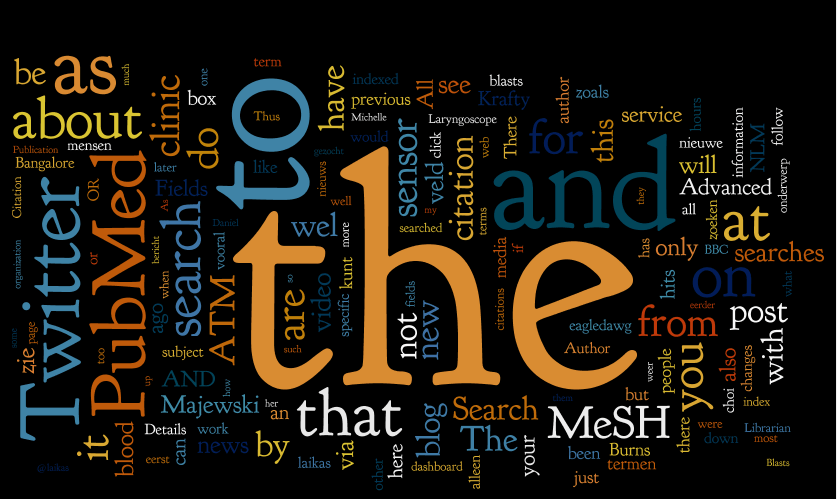

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
df = pd.read_csv('hotel-reviews.csv')

In [4]:
df.head(2)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy


In [5]:
a = pd.get_dummies(df.Is_Response,prefix='res')

In [6]:
df_label = pd.concat([df,a],axis=1)

In [7]:
df_label.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,res_happy,res_not happy
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0,1
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0,1
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0,1
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,1,0
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,0,1


In [8]:
df1 = df_label.drop(columns=['Is_Response','res_not happy'])

In [9]:
df1.describe(include="O")

,User_ID,Description,Browser_Used,Device_Used
count,38932,38932,38932,38932
unique,38932,38932,11,3
top,id19186,We stayed - nights at the Hotel in - rooms whi...,Firefox,Desktop
freq,1,1,7367,15026


In [10]:
def text_process(text):
#   word = text.lower()
#   word = word.split()
    word = re.sub('[^A-za-z]',' ',text)
    word = word.lower()
    word = word.split()
    word = [words for words in word if words not in stopwords.words('english')]
    word = [WordNetLemmatizer().lemmatize(words) for words in word]
    word = ' '.join(word)
    return word

In [11]:
df1['Reviews'] = df1['Description'].iloc[:].apply(text_process)

In [12]:
df1.head()

,User_ID,Description,Browser_Used,Device_Used,res_happy,Reviews
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,0,room kind clean strong smell dog generally ave...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,0,stayed crown plaza april april staff friendly ...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,0,booked hotel hotwire lowest price could find g...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,1,stayed husband son way alaska cruise loved hot...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,0,girlfriend stayed celebrate th birthday planne...


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = cv.fit_transform(df1['Reviews'].iloc[:10000]).toarray()
# X = df1['Reviews']
y = df1['res_happy'].iloc[:10000]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[ 696,  263],
       [ 145, 1896]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       959
           1       0.88      0.93      0.90      2041

    accuracy                           0.86      3000
   macro avg       0.85      0.83      0.84      3000
weighted avg       0.86      0.86      0.86      3000



In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.864


In [45]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence
from tensorflow.keras.preprocessing import sequence
# max_feature = 2000

In [46]:
X_train,X_test,y_train,y_test = train_test_split(df1['Reviews'],df1['res_happy'],test_size = 0.3,random_state = 0)

In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [48]:
train_X = tokenizer.texts_to_sequences(X_train)
test_X = tokenizer.texts_to_sequences(X_test)

In [49]:
vocab_size = len(tokenizer.word_index) + 1 

In [50]:
from keras.preprocessing.sequence import pad_sequences
max_len = 100
train_X = pad_sequences(train_X,padding='post',maxlen=max_len)
test_X = pad_sequences(test_X,padding='post',maxlen=max_len)

Using TensorFlow backend.


In [60]:
batch_size = 32
model = Sequential()
model.add(Embedding(input_dim = vocab_size,output_dim = 64,input_length = max_len))
model.add(LSTM(64*2,dropout = 0.2))
# model.add(LSTM(64*2,dropout = 0.2,return_sequences = False))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 64)           2250944   
_________________________________________________________________
lstm_16 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,349,889
Trainable params: 2,349,889
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
model.fit(train_X, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(test_X, y_test))

Train on 27252 samples, validate on 11680 samples
Epoch 1/15
27252/27252 [==============================] - 225s 8ms/sample - loss: 0.5909 - acc: 0.6984 - val_loss: 0.5710 - val_acc: 0.7027
Epoch 2/15
27252/27252 [==============================] - 230s 8ms/sample - loss: 0.4694 - acc: 0.7905 - val_loss: 0.4052 - val_acc: 0.8329
Epoch 3/15
27252/27252 [==============================] - 233s 9ms/sample - loss: 0.3733 - acc: 0.8471 - val_loss: 0.3481 - val_acc: 0.8600
Epoch 4/15
27252/27252 [==============================] - 223s 8ms/sample - loss: 0.3116 - acc: 0.8779 - val_loss: 0.3679 - val_acc: 0.8521
Epoch 5/15
27252/27252 [==============================] - 215s 8ms/sample - loss: 0.2749 - acc: 0.8949 - val_loss: 0.3259 - val_acc: 0.8639
Epoch 6/15
27252/27252 [==============================] - 214s 8ms/sample - loss: 0.2410 - acc: 0.9068 - val_loss: 0.3240 - val_acc: 0.8671
Epoch 7/15
27252/27252 [==============================] - 226s 8ms/sample - loss: 0.2134 - acc: 0.9208 - val_l